In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Shark Tank Australia dataset.csv')


In [2]:
print(df.head())

   Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
0              1  CricketCooler               1             1     8-Feb-15   
1              1     RentResumé               1             2     8-Feb-15   
2              1     CASEBOARDS               1             3     8-Feb-15   
3              1         Hamdog               1             4     8-Feb-15   
4              1  EdibleBugShop               2             5     8-Feb-15   

  Season End Original Air Date                 Industry  \
0   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
1   7-Jun-15          8-Feb-15            Software/Tech   
2   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
3   7-Jun-15          8-Feb-15        Food and Beverage   
4   7-Jun-15         15-Feb-15        Business Services   

                                Business Description  \
0               An esky with attached cricket stumps   
1  Online rental subscription that details rental...   
2  Porta

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                279 non-null    int64  
 1   Startup Name                 279 non-null    object 
 2   Episode Number               279 non-null    int64  
 3   Pitch Number                 279 non-null    int64  
 4   Season Start                 279 non-null    object 
 5   Season End                   279 non-null    object 
 6   Original Air Date            279 non-null    object 
 7   Industry                     279 non-null    object 
 8   Business Description         279 non-null    object 
 9   Company Website              231 non-null    object 
 10  Pitchers Gender              275 non-null    object 
 11  Pitchers Average Age         275 non-null    object 
 12  Pitchers City                233 non-null    object 
 13  Pitchers State      

In [4]:
print(df.describe())

       Season Number  Episode Number  Pitch Number  Multiple Entrepreneurs  \
count     279.000000      279.000000    279.000000              278.000000   
mean        3.125448        6.655914    140.000000                0.410072   
std         1.671394        3.806927     80.684571                0.492733   
min         1.000000        1.000000      1.000000                0.000000   
25%         2.000000        3.000000     70.500000                0.000000   
50%         3.000000        6.000000    140.000000                0.000000   
75%         4.000000       10.000000    209.500000                1.000000   
max         6.000000       15.000000    279.000000                1.000000   

       Original Ask Amount  Original Offered Equity  Valuation Requested  \
count         2.780000e+02               278.000000         2.780000e+02   
mean          2.777807e+05                16.396403         2.184025e+06   
std           4.653867e+05                 9.373843         3.054192e

In [5]:
print(df.isnull().sum())

Season Number                    0
Startup Name                     0
Episode Number                   0
Pitch Number                     0
Season Start                     0
Season End                       0
Original Air Date                0
Industry                         0
Business Description             0
Company Website                 48
Pitchers Gender                  4
Pitchers Average Age             4
Pitchers City                   46
Pitchers State                  38
Entrepreneur Names               2
Multiple Entrepreneurs           1
Viewers                         35
Original Ask Amount              1
Original Offered Equity          1
Valuation Requested              1
Received Offer                   0
Accepted Offer                 100
Total Deal Amount              125
Total Deal Equity              125
Deal Valuation                 125
Number of Sharks in Deal       125
Investment Amount Per Shark    125
Equity Per Shark               125
Royalty Deal        

In [6]:
df = df.drop_duplicates()

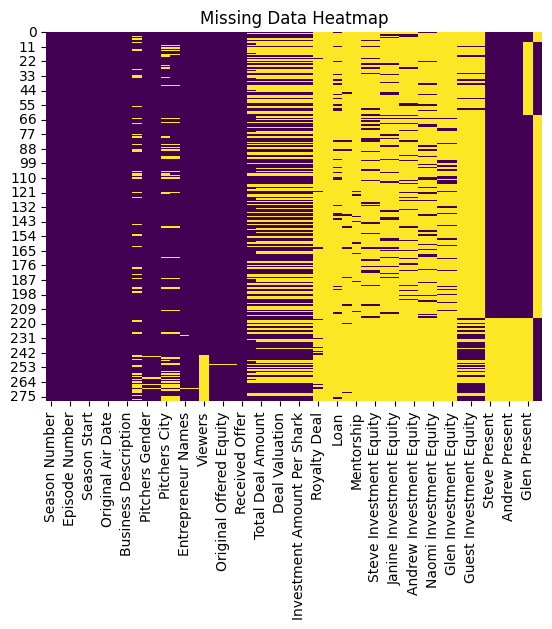

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [10]:
df['Total Deal Amount']= df['Total Deal Amount'].fillna(0)

In [12]:
print("Total Deal Amount:", df['Total Deal Amount'].sum())

Total Deal Amount: 31924032.0


In [14]:
shark_cols = [
    'Steve Investment Amount', 'Janine Investment Amount',
    'Andrew Investment Amount', 'Naomi Investment Amount',
    'Glen Investment Amount', 'Guest Investment Amount'
]
deal_counts = df[shark_cols].notna().sum().sort_values(ascending=False)
print("Deals per Shark:\n", deal_counts)

Deals per Shark:
 Guest Investment Amount     49
Naomi Investment Amount     33
Steve Investment Amount     32
Janine Investment Amount    29
Andrew Investment Amount    28
Glen Investment Amount      26
dtype: int64


In [15]:
total_investments = df[shark_cols].sum().sort_values(ascending=False)
print("Total Amount Invested by Each Shark:\n", total_investments)

Total Amount Invested by Each Shark:
 Guest Investment Amount     8.338000e+06
Andrew Investment Amount    5.606517e+06
Janine Investment Amount    5.306000e+06
Naomi Investment Amount     4.520015e+06
Steve Investment Amount     4.229500e+06
Glen Investment Amount      3.924000e+06
dtype: float64


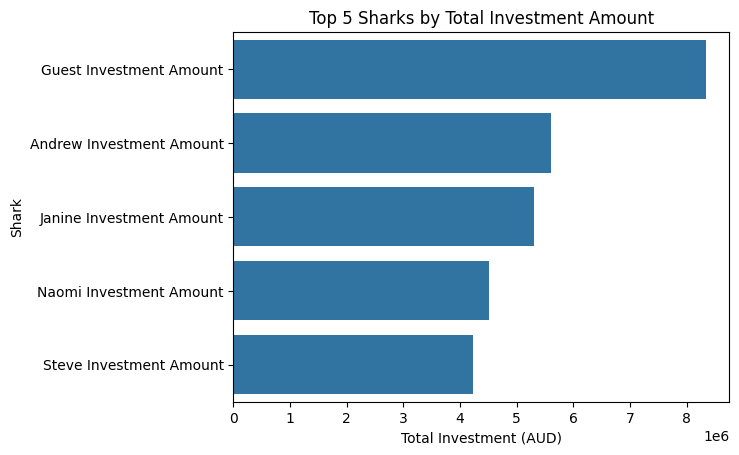

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

top_investments = total_investments.head(5)
sns.barplot(x=top_investments.values, y=top_investments.index)
plt.title("Top 5 Sharks by Total Investment Amount")
plt.xlabel("Total Investment (AUD)")
plt.ylabel("Shark")
plt.show()

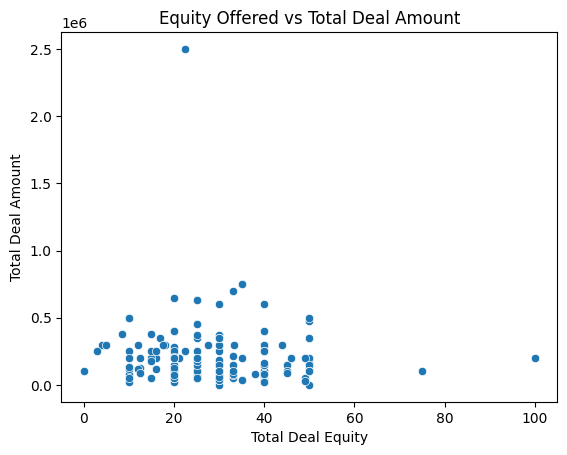

In [17]:
sns.scatterplot(x='Total Deal Equity', y='Total Deal Amount', data=df)
plt.title("Equity Offered vs Total Deal Amount")
plt.show()

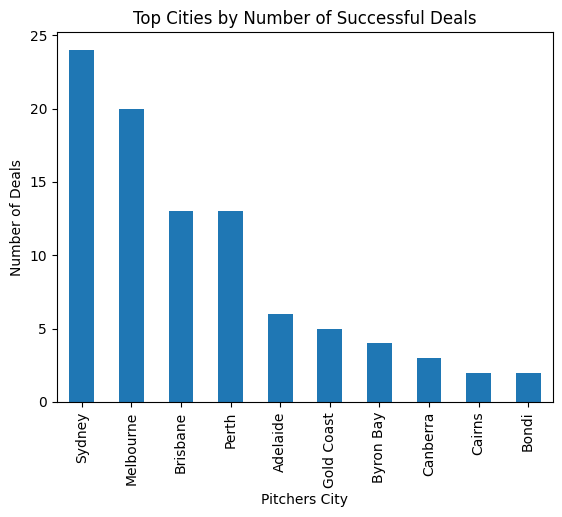

In [19]:
success_by_city = df[df['Accepted Offer'] == 1]['Pitchers City'].value_counts().head(10)
success_by_city.plot(kind='bar', title='Top Cities by Number of Successful Deals')
plt.ylabel("Number of Deals")
plt.show()

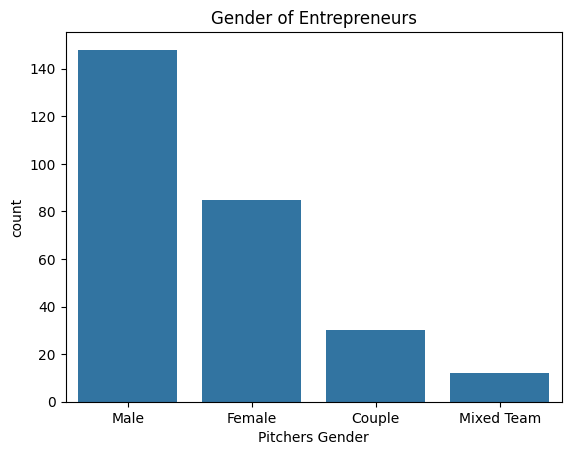

In [20]:
sns.countplot(data=df, x='Pitchers Gender')
plt.title("Gender of Entrepreneurs")
plt.show()

In [21]:
shark_columns = [col for col in df.columns if 'Investment Amount' in col and 'Guest' not in col]
active_sharks = df[shark_columns].notnull().sum().sort_values(ascending=False)
print("Most Active Sharks by Number of Deals:")
print(active_sharks)

Most Active Sharks by Number of Deals:
Investment Amount Per Shark    154
Naomi Investment Amount         33
Steve Investment Amount         32
Janine Investment Amount        29
Andrew Investment Amount        28
Glen Investment Amount          26
dtype: int64


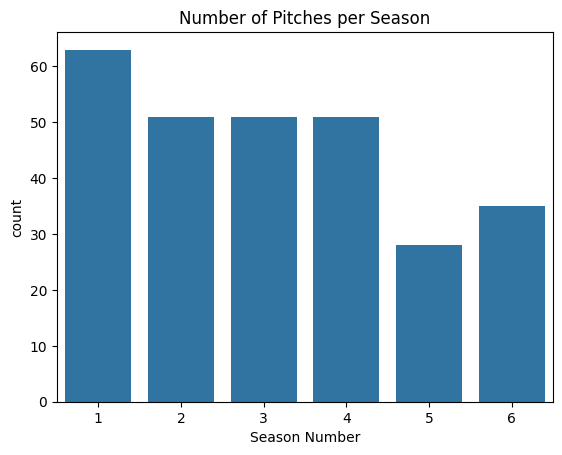

In [23]:

sns.countplot(data=df, x='Season Number')
plt.title("Number of Pitches per Season")
plt.show()

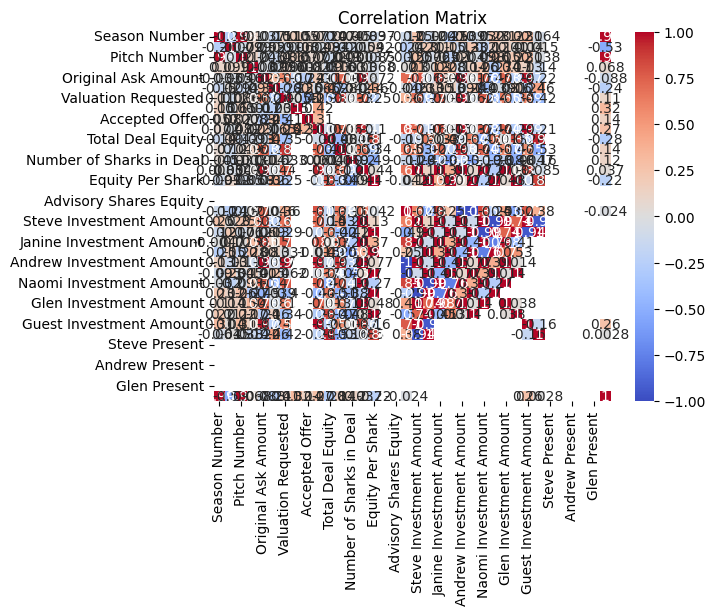

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [26]:
df.to_csv("cleaned_shark_tank_dataset.csv", index=False)